In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
sys.path.append('../src')
from ocr.normalization import word_normalization, letter_normalization
from ocr import word,page,characters
from ocr.helpers import implt, resize
from ocr.tfhelpers import Model
from ocr.datahelpers import idx2char

Instructions for updating:
non-resource variables are not supported in the long term
Loading segmentation models...
INFO:tensorflow:Restoring parameters from G:\ocr\handwrittern_using_ctc\ocr-handwriting-models\gap-clas\CNN-CG
INFO:tensorflow:Restoring parameters from G:\ocr\handwrittern_using_ctc\ocr-handwriting-models\gap-clas\RNN\Bi-RNN-new


In [12]:
!pip install opencv-python

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

In [3]:
#LANG = 'en'
# You can use only one of these two
# You HABE TO train the CTC model by yourself using word_classifier_CTC.ipynb
MODEL_LOC_CHARS = f'G:\ocr\handwrittern_using_ctc\ocr-handwriting-models\char-clas\en\CharClassifier'
MODEL_LOC_CTC = 'G:\ocr\handwrittern_using_ctc\ocr-handwriting-models\word-clas\CTC\Classifier1'

In [4]:
CHARACTER_MODEL = Model(MODEL_LOC_CHARS)
CTC_MODEL = Model(MODEL_LOC_CTC, 'word_prediction')

INFO:tensorflow:Restoring parameters from G:\ocr\handwrittern_using_ctc\ocr-handwriting-models\char-clas\en\CharClassifier
INFO:tensorflow:Restoring parameters from G:\ocr\handwrittern_using_ctc\ocr-handwriting-models\word-clas\CTC\Classifier1


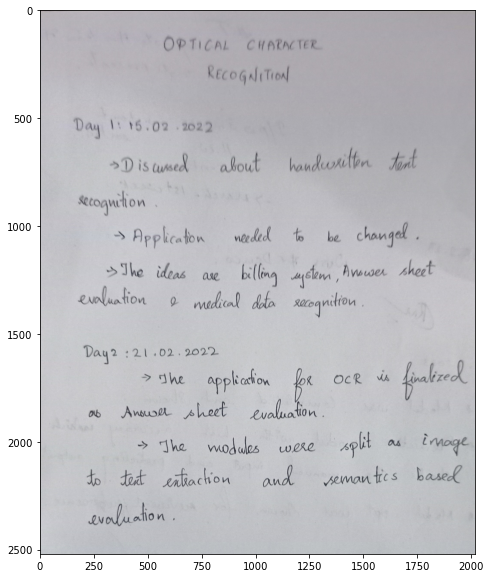

In [5]:
IMG="G:\ocr\handwrittern_using_ctc\media\IMG20230308114842.jpg"
image = cv2.cvtColor(cv2.imread(IMG), cv2.COLOR_BGR2RGB)
implt(image)

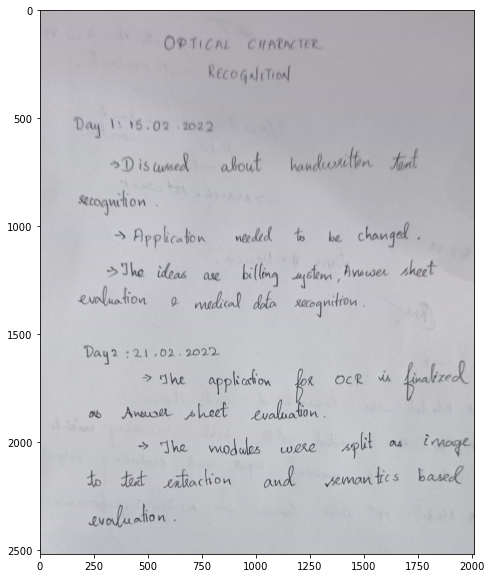

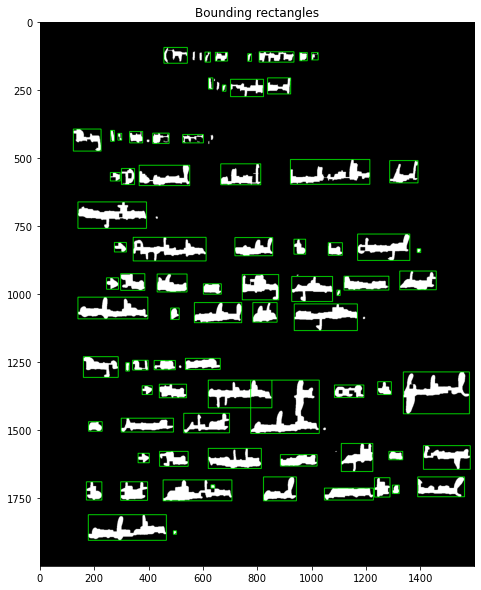

In [6]:
crop = page.detection(image)
implt(crop)
boxes = word.detection(crop)
lines = word.sort_words(boxes)

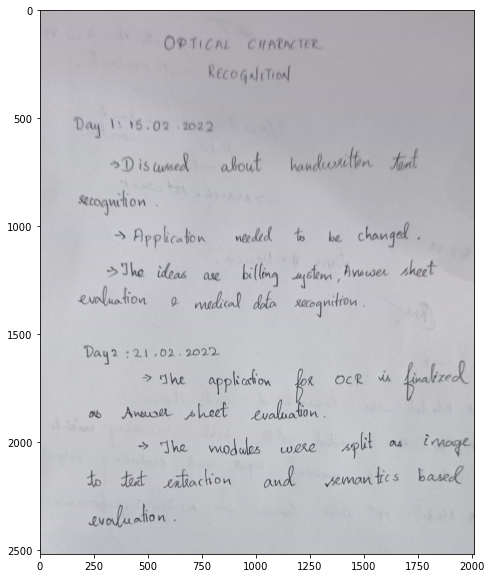

op e a1 1 rpeaC it a
t 1 obat fiont
Day y 1 i5 or 202
s D iscursed about handewsetten tent
seeaguition
I Application needed to be changel a
s The ideas are billing ystem Answer sheet
evaluation medical dlota secagsition 1
O
Days e a1 102 2022 fiaked
I the application taaoken OcT is
ab Anouer sheef
s The modudes were splt as Image
to test enteaction n and seman tix s based
evaluation
a


In [7]:
def recognise(img):
    """Recognising words using CTC Model."""
    img = word_normalization(
        img,
        64,
        border=False,
        tilt=False,
        hyst_norm=False)
    length = img.shape[1]
    # Input has shape [batch_size, height, width, 1]
    input_imgs = np.zeros(
            (1, 64, length, 1), dtype=np.uint8)
    input_imgs[0][:, :length, 0] = img

    pred = CTC_MODEL.eval_feed({
        'inputs:0': input_imgs,
        'inputs_length:0': [length],
        'keep_prob:0': 1})[0]

    word = ''
    for i in pred:
        word += idx2char(i + 1)
    return word

implt(crop)
for line in lines:
    output=" ".join([recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line])
    print(output)